In [1]:
%matplotlib inline
from data import get_data_from_mat
from pandas import DataFrame
import scipy.misc as smp
import matplotlib.pyplot as plt
import seaborn
import pandas
import numpy
from algos import process_data_by_classification_and_set, convert_data_to_dict_of_array, LogisticRegression
seaborn.set(style='darkgrid')
seaborn.set_context('notebook')


# One-vs-All logistic regression multi-class classification
# Feedforward Neural Network simple example

#### Getting data and setting training set size

In [3]:
training_set_lenth = 4000

original_data = get_data_from_mat('ex3data1.mat')
initial_weights_data = get_data_from_mat('ex3weights.mat')
x_data = DataFrame(original_data['X'])
y_data = DataFrame(original_data['y'])
y_data.columns = ['y']
xy_data_df = pandas.concat([x_data, y_data], axis='columns')
data_store_dictionary = process_data_by_classification_and_set(xy_data_df, training_set_lenth)
input_data_dictionary = convert_data_to_dict_of_array(data_store_dictionary)




In [73]:
input_data_dictionary['regularized_lambda'] = 0.0
input_data_dictionary['number_of_iteration'] = 1000
input_data_dictionary['learning_rate'] = 0.45

In [74]:
logit_regression = LogisticRegression(**input_data_dictionary)
logit_regression.train()

Training accuracy is: 0.91525


In [75]:
logit_regression.training_predicted_y

array([ 9,  9, 10, ...,  3,  3,  4], dtype=int64)

In [76]:
input_data_dictionary['y_variables']

array([ 4,  9, 10, ...,  3,  3,  4], dtype=uint8)

In [77]:
logit_regression.test()

Testing accuracy is: 0.907


In [71]:
def get_row_number(class_number):
    if class_number >= 6:
        return 1
    elif class_number <= 5:
        return 0
    
def get_column_number(class_number):
    map_class = {1: 0, 6: 0, 2: 1, 7: 1, 3: 2, 8: 2, 4: 3, 9: 3, 5: 4, 10: 4}
    return map_class[class_number]

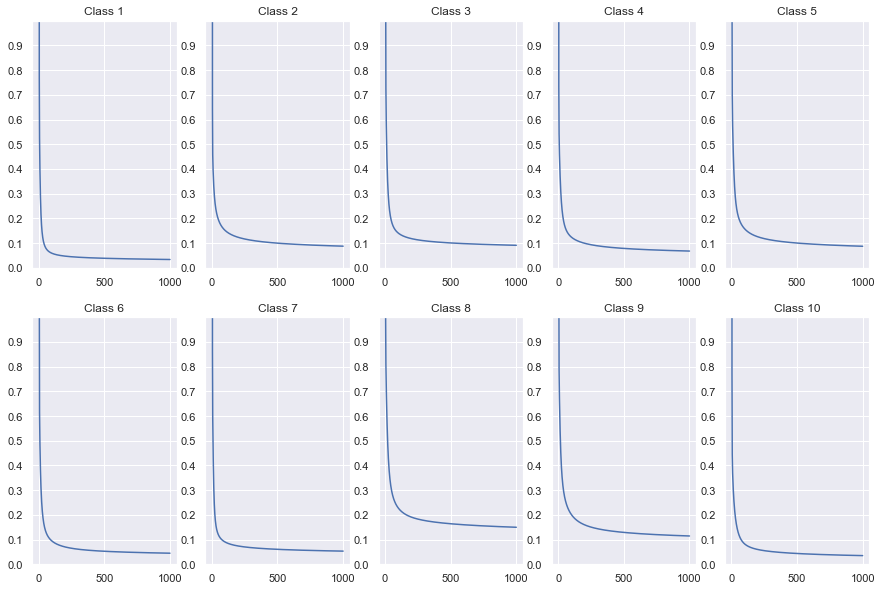

In [78]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
for class_, iteration_chart in logit_regression.iteration_cost_df_by_class.items():
    axes[get_row_number(class_), get_column_number(class_)].set_title('Class ' + str(class_))
    axes[get_row_number(class_), get_column_number(class_)].plot(iteration_chart['No_of_iteration'], iteration_chart['cost'])
    axes[get_row_number(class_), get_column_number(class_)].set_ylim([0, 1])
    axes[get_row_number(class_), get_column_number(class_)].set_yticks(numpy.arange(0, 1, step=0.1))
    

In [35]:
input_layer_weights = initial_weights_data['Theta1']
second_layer_weights = initial_weights_data['Theta2']

In [30]:
def add_bias_ones(array):
    # array with shape (number of datapoints, number of features)
    bias_term_array = numpy.ones((array.shape[0], 1))
    
    return numpy.append(array[:, ::-1], bias_term_array, axis=1)[:, ::-1]



In [31]:
nn_training_x = add_bias_ones(input_data_dictionary['x_variables'])
nn_testing_x = add_bias_ones(input_data_dictionary['testing_x_variables'])

In [43]:
second_layer_activation_values = 1 / (1 + numpy.exp(-nn_training_x.dot(input_layer_weights.T))) # Each row representing 25 activation values for 25 neruons in the second layer

In [45]:
second_layer_activation_values = add_bias_ones(second_layer_activation_values)

In [49]:
output_layer_activation_values = 1 / (1 + numpy.exp(-second_layer_activation_values.dot(second_layer_weights.T)))
# Each row representing the probability of each column classification of those 4000 datapoints

In [82]:
nn_predicted_traing_y = output_layer_activation_values.argmax(axis=1) + 1

In [84]:
nn_training_accuracy = numpy.sum(nn_predicted_traing_y == input_data_dictionary['y_variables']) / len(input_data_dictionary['y_variables'])
print("Neural Network Training Accuracy: " + str(nn_training_accuracy))

Neural Network Training Accuracy: 0.97375


# Neural Network implementation

In [94]:
y_variables = input_data_dictionary['y_variables'].reshape(4000, 1)

In [108]:
class_mask = numpy.array([numpy.unique(y_variables)]*4000)

In [112]:
y_variables_mask = numpy.array([input_data_dictionary['y_variables']]*10).T

In [115]:
((y_variables_mask == class_mask) * 1).shape

(4000, 10)

In [126]:
numpy.ones((1, 1))

array([[1.]])

In [134]:
for i in reversed(range(2, 4)):
    print(i)

3
2


In [136]:
input_layer_weights.shape

(25, 401)